# Интро

Наша цель - предсказать стоимость каждого дома

![image.png](attachment:image.png)

# Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import warnings
warnings.filterwarnings('ignore')
import time
import re

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

In [2]:
pd.set_option('display.max_columns',40)

# Данные

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

dfs = [train, test]

In [4]:
#shape
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)

#preview
train.head()

Train set shape: (1460, 81)
Test set shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,...,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,...,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,...,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,...,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,...,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# EDA

## Распределение целевого признака

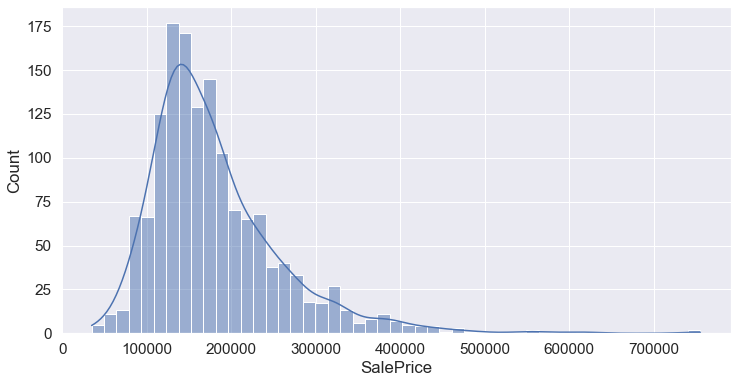

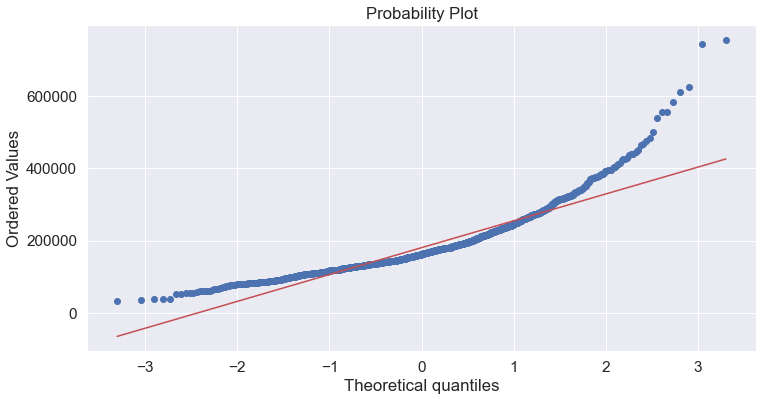

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='SalePrice', kde=True)

plt.figure(figsize=(12, 6))
stats.probplot(train.SalePrice, plot=plt);

**Наблюдения**:
* Таргет скошен вправо, это проблемно для многих моделей машинного обучения

In [7]:
print("Skewness: %f" %train['SalePrice'].skew())
print("Kurtosis: %f" %train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


`Skewness > 0` - асимметричное распределение справа

`Kurtosis > 0` - распределение более плоское, по сравнению с нормальным

Чтобы вернуться к нормальному распределению, пролагорифмируем признак

In [8]:
train["SalePrice"]=np.log(train["SalePrice"])

Проверка:

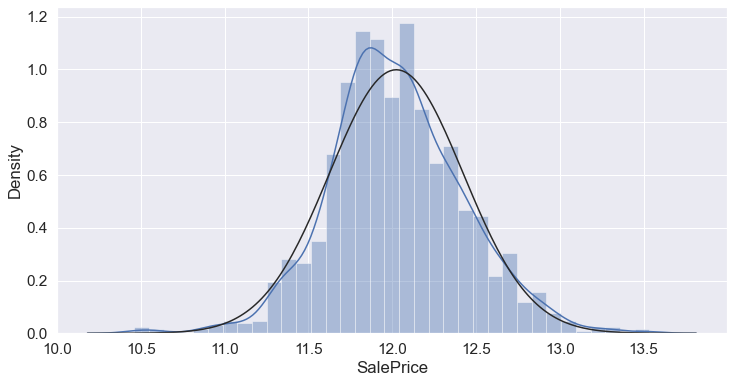

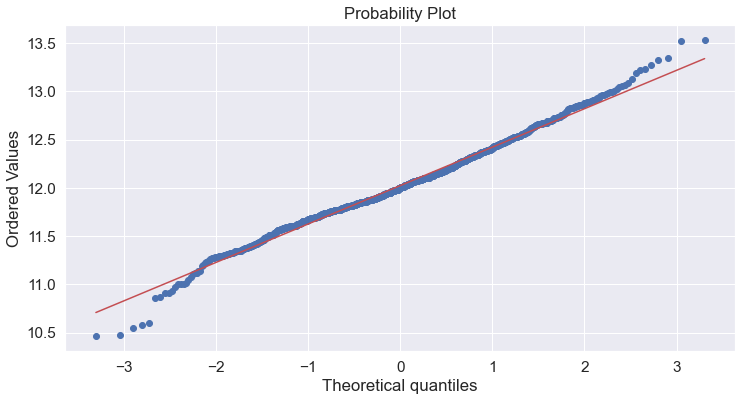

In [9]:
fig = plt.figure(figsize=(12, 6))
sns.distplot(train['SalePrice'], fit=norm)

plt.figure(figsize=(12, 6))
stats.probplot(train.SalePrice, plot=plt);

## Матрица корреляции

<AxesSubplot:>

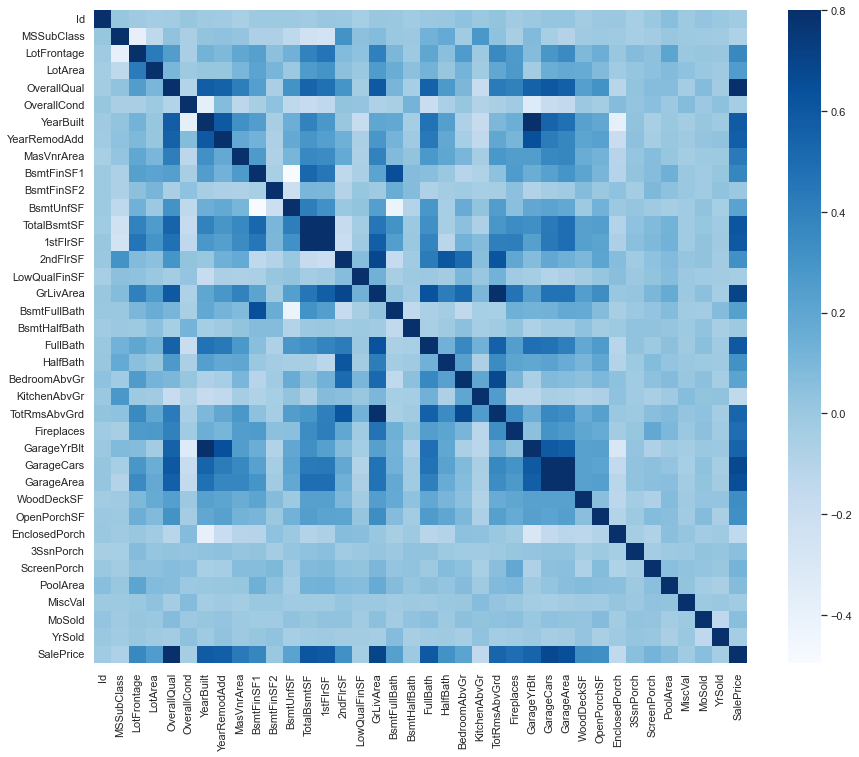

In [10]:
plt.figure(figsize=(15, 12))
sns.set(font_scale=1)

sns.heatmap(train.corr(), vmax=.8, square=True, cmap='Blues')

Также добавим матрицу корреляции с признаками, которые больше всего коррелируют с таргетом

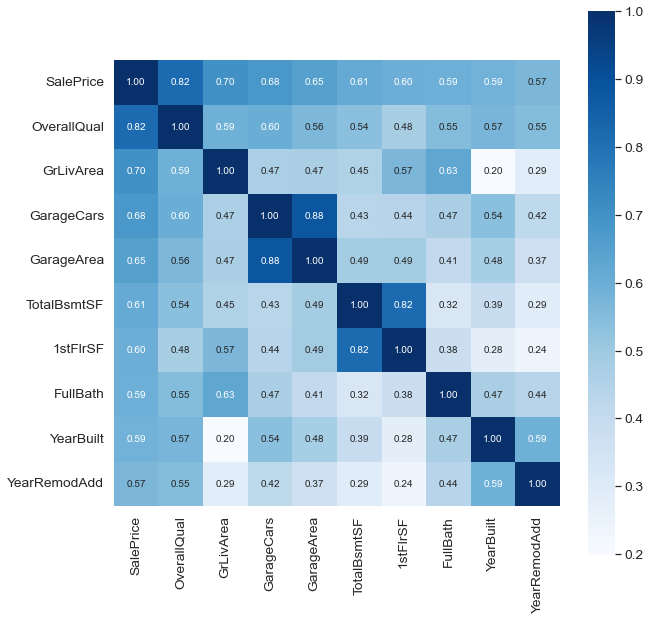

In [11]:
# saleprice correlation matrix
corrmat = train.corr()

k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)

plt.figure(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
                 'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
plt.show()

**Наблюдения**:
* Фичи, коррелирующие друг с другом: `YearBuilt` и `GarageYrBlt`; `TotRmsAbvGrd` и `GrLivArea`; `1stFlrSF` и `TotalBsmtSF`; `GrLivArea` и `TotRmsAbvGrd`; `GarageArea` и `GarageCars`

**Идеи**:
* Удалить признаки `GarageYrBlt`, `TotRmsAbvGrd`, `1stFlrSF` и `GarageArea` (основываясь на корреляции признаков с таргетом)

In [12]:
for df in dfs:
    df.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea'], axis=1, inplace=True)

## Категориальные и количественные признаки 

In [13]:
cats = train.select_dtypes('object')
nums = train.select_dtypes(['int64', 'float64'])

In [14]:
# Количество уникальных значений в каждом признаке
for cat in cats:
    print(f'{cat}:\n {cats[cat].nunique()} уникальных значений')

MSZoning:
 5 уникальных значений
Street:
 2 уникальных значений
Alley:
 2 уникальных значений
LotShape:
 4 уникальных значений
LandContour:
 4 уникальных значений
Utilities:
 2 уникальных значений
LotConfig:
 5 уникальных значений
LandSlope:
 3 уникальных значений
Neighborhood:
 25 уникальных значений
Condition1:
 9 уникальных значений
Condition2:
 8 уникальных значений
BldgType:
 5 уникальных значений
HouseStyle:
 8 уникальных значений
RoofStyle:
 6 уникальных значений
RoofMatl:
 8 уникальных значений
Exterior1st:
 15 уникальных значений
Exterior2nd:
 16 уникальных значений
MasVnrType:
 4 уникальных значений
ExterQual:
 4 уникальных значений
ExterCond:
 5 уникальных значений
Foundation:
 6 уникальных значений
BsmtQual:
 4 уникальных значений
BsmtCond:
 4 уникальных значений
BsmtExposure:
 4 уникальных значений
BsmtFinType1:
 6 уникальных значений
BsmtFinType2:
 6 уникальных значений
Heating:
 6 уникальных значений
HeatingQC:
 5 уникальных значений
CentralAir:
 2 уникальных значений
El

In [15]:
for num in nums:
    print(f'{num}:\n {nums[num].nunique()} уникальных значений')

Id:
 1460 уникальных значений
MSSubClass:
 15 уникальных значений
LotFrontage:
 110 уникальных значений
LotArea:
 1073 уникальных значений
OverallQual:
 10 уникальных значений
OverallCond:
 9 уникальных значений
YearBuilt:
 112 уникальных значений
YearRemodAdd:
 61 уникальных значений
MasVnrArea:
 327 уникальных значений
BsmtFinSF1:
 637 уникальных значений
BsmtFinSF2:
 144 уникальных значений
BsmtUnfSF:
 780 уникальных значений
TotalBsmtSF:
 721 уникальных значений
2ndFlrSF:
 417 уникальных значений
LowQualFinSF:
 24 уникальных значений
GrLivArea:
 861 уникальных значений
BsmtFullBath:
 4 уникальных значений
BsmtHalfBath:
 3 уникальных значений
FullBath:
 4 уникальных значений
HalfBath:
 3 уникальных значений
BedroomAbvGr:
 8 уникальных значений
KitchenAbvGr:
 4 уникальных значений
Fireplaces:
 4 уникальных значений
GarageCars:
 5 уникальных значений
WoodDeckSF:
 274 уникальных значений
OpenPorchSF:
 202 уникальных значений
EnclosedPorch:
 120 уникальных значений
3SsnPorch:
 20 уникал

Среди нумерных типов есть категориальные признаки. Отсечем те признаки, у которых уникальных значений меньше 25

In [16]:
for num in nums:
    if nums[num].nunique() < 25:
        cats[num] = nums[num]
        nums = nums.drop(num, axis=1)

In [17]:
nums.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SalePrice'],
      dtype='object')

In [18]:
cats.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', '3SsnPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

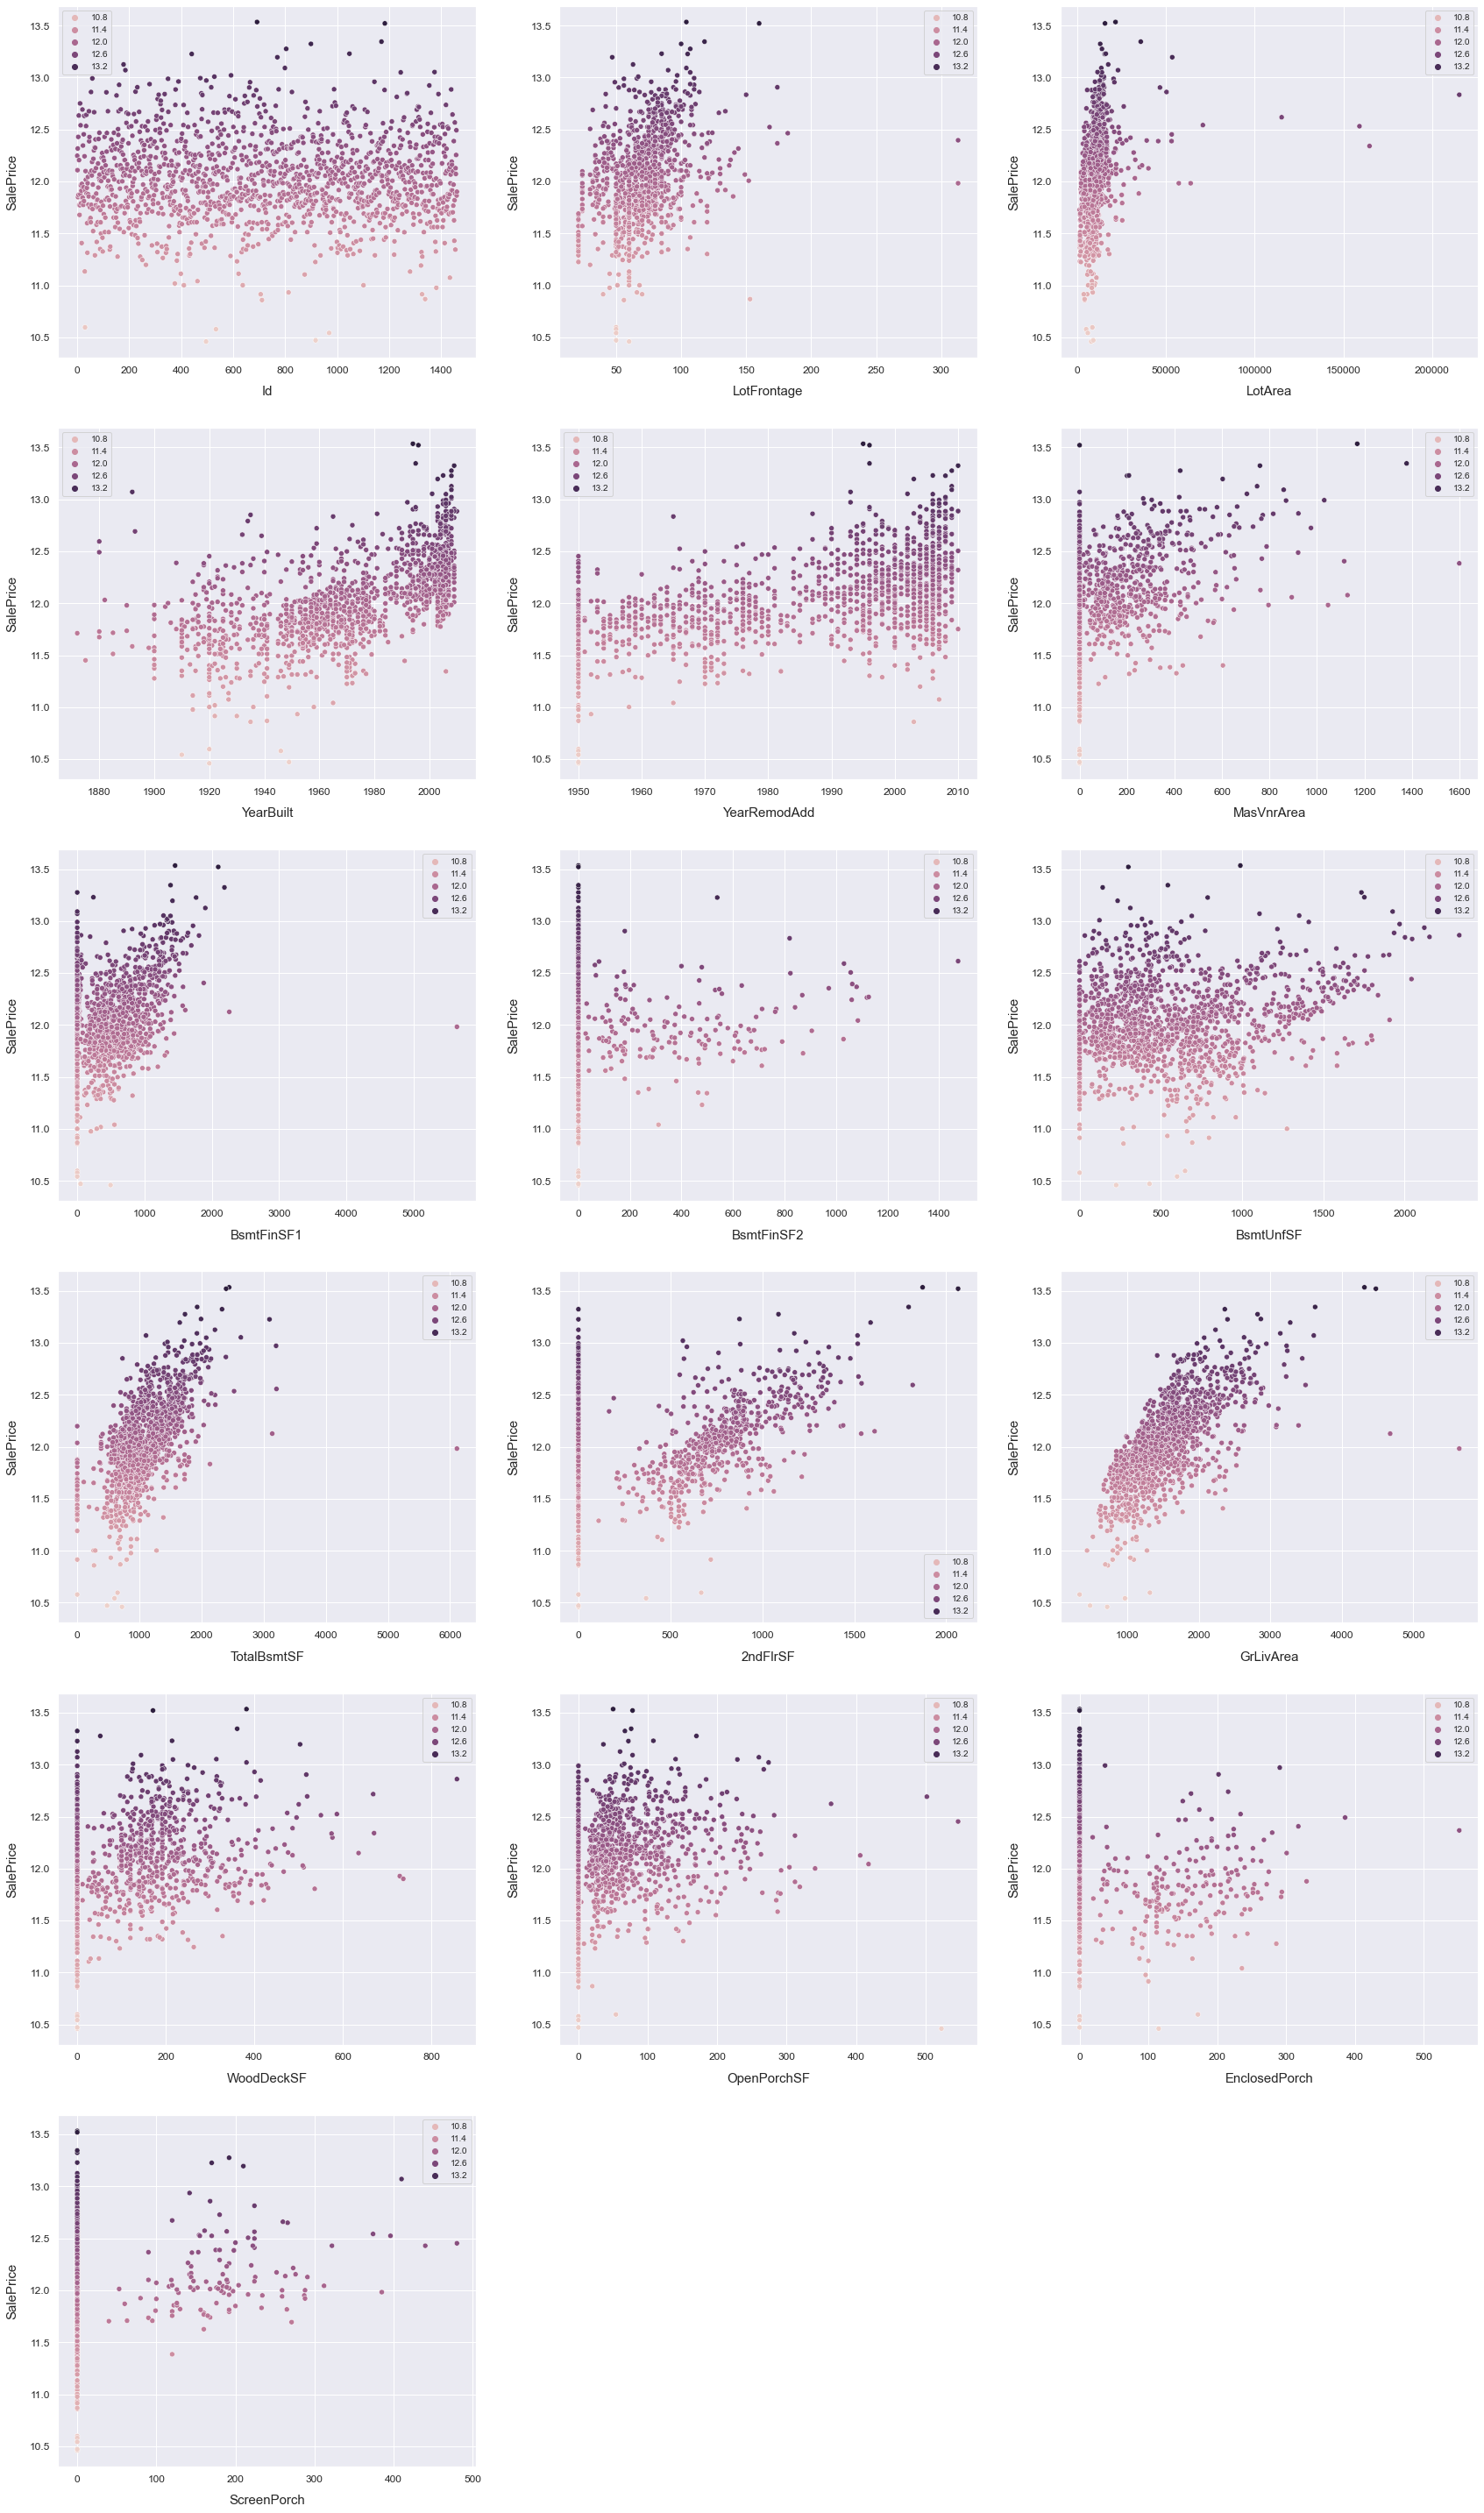

In [19]:
# Визуализация
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 60))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(nums), 1):
    if feature=='SalePrice':
        break
    plt.subplot(len(list(nums)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', data=train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

**Наблюдения**:
* Выбросы: `LotFrontage` > 200, `LotArea` > 100000, `BsmtFinSF1` > 3000, `TotalBsmtSF` > 4000, `GrLivArea` > 4000 & `SalePrice` < 12.5
* Большинство признаков линейно зависимы от таргета

**Идеи**:
* Удалить выбросы

In [20]:
train = train[(train['LotFrontage'] < 200)&(train['LotArea'] < 100000)&
              (train['BsmtFinSF1']<3000)&(train['TotalBsmtSF'] < 4000)&
             (~(train['GrLivArea']>4000) & (train['SalePrice']<125000))]

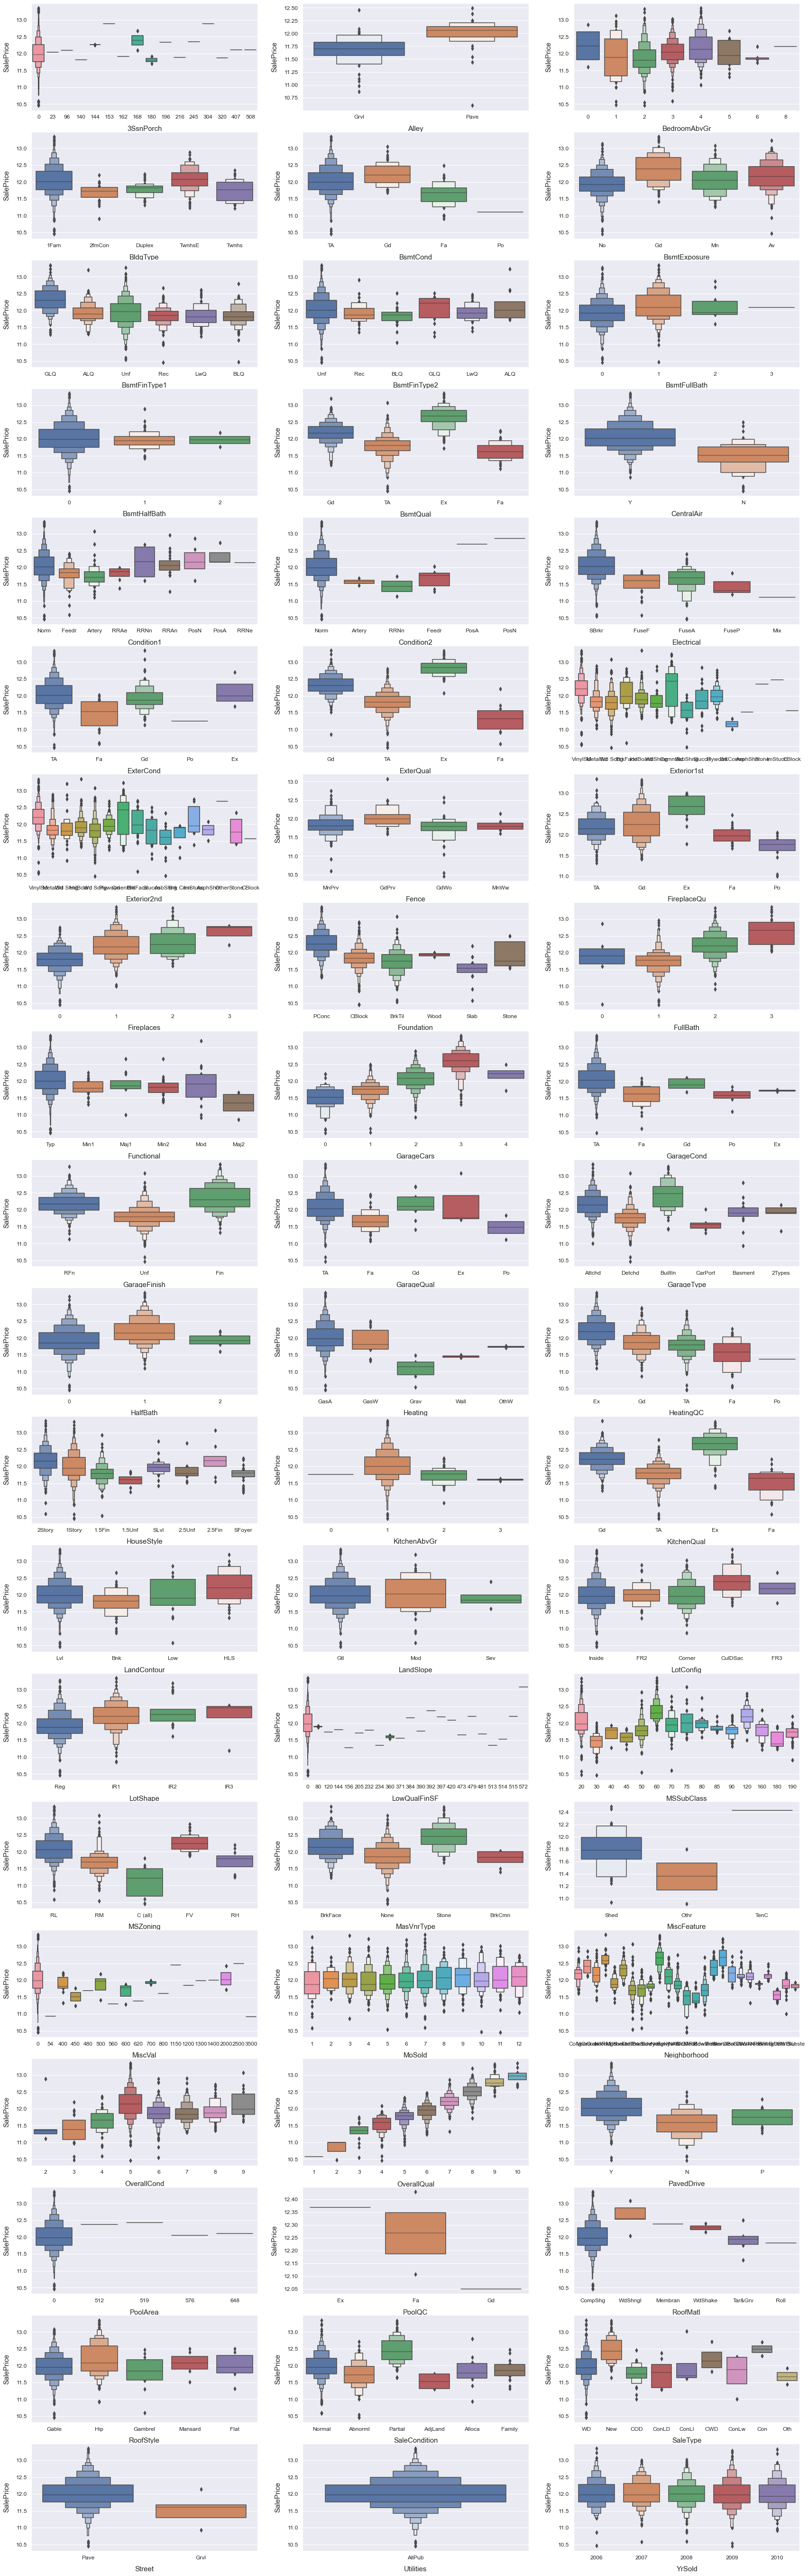

In [21]:
# Визуализация
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(sorted(list(cats)), 1):
    plt.subplot(len(list(cats)), 3, i);
    sns.boxenplot(x=feature, y='SalePrice', data=train);
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5);
    plt.ylabel('SalePrice', size=15, labelpad=12.5);
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12);
        plt.tick_params(axis='y', labelsize=12);

        
plt.show();

In [22]:
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1195, 76), (1459, 75))

# Feature Engineering

In [23]:
# Split features and labels
train_labels = train['SalePrice'].reset_index(drop=True)
X_train = train.drop(['SalePrice'], axis=1)
X_test = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
data = pd.concat([X_train, X_test]).reset_index(drop=True)
data.shape

(2654, 75)

## Пропуски

In [24]:
total = data.isna().sum().sort_values(ascending=False)
percent = ((data.isna().sum() / data.isna().count()) * 100).sort_values(ascending=False)
types = data.dtypes
missing_data = pd.concat([total, percent, types], axis=1, keys=['Total', 'Percent', 'Types'])
missing_data.head(35)

,Total,Percent,Types
PoolQC,2647,99.736247,object
MiscFeature,2564,96.608892,object
Alley,2461,92.727958,object
Fence,2137,80.519970,object
FireplaceQu,1330,50.113037,object
LotFrontage,227,8.553127,float64
GarageCond,152,5.727204,object
GarageQual,152,5.727204,object
GarageFinish,152,5.727204,object
GarageType,150,5.651846,object


Первые 6 признаков (где 50%+ пропусков) мы просто удалим, заполнить мы их достоверно не сможем. С остальными сейчас разберемся отдельно

In [25]:
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [26]:
# Заполняем по порядку
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Гаражи: из описания: если пропуск, то гаража нет
data['GarageCars'] = data['GarageCars'].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col] = data[col].fillna('None')
    
# С подвалом та же история
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

# the data description states that NA refers to typical ('Typ') values
data['Functional'] = data['Functional'].fillna('Typ')
# Replace the missing values in each of the columns below with their mode
data['Electrical'] = data['Electrical'].fillna("SBrkr")
data['KitchenQual'] = data['KitchenQual'].fillna("TA")
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# Остальные заполним 'None' или 0
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in data.columns:
    if data[i].dtype in numeric_dtypes:
        numeric.append(i)
data.update(data[numeric].fillna(0))  

objects = []
for i in data.columns:
    if data[i].dtype == object:
        objects.append(i)
data.update(data[objects].fillna('None'))

In [27]:
total = data.isna().sum().sort_values(ascending=False)
percent = ((data.isna().sum() / data.isna().count()) * 100).sort_values(ascending=False)
types = data.dtypes
missing_data = pd.concat([total, percent, types], axis=1, keys=['Total', 'Percent', 'Types'])
missing_data.head(10)

,Total,Percent,Types
MSSubClass,0,0.0,int64
BsmtFullBath,0,0.0,float64
KitchenQual,0,0.0,object
KitchenAbvGr,0,0.0,int64
BedroomAbvGr,0,0.0,int64
HalfBath,0,0.0,int64
FullBath,0,0.0,int64
BsmtHalfBath,0,0.0,float64
GrLivArea,0,0.0,int64
Fireplaces,0,0.0,int64


## Нормальность распределения

In [28]:
nums.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [29]:
data[nums.columns].dtypes

LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
2ndFlrSF           int64
GrLivArea          int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
ScreenPorch        int64
dtype: object

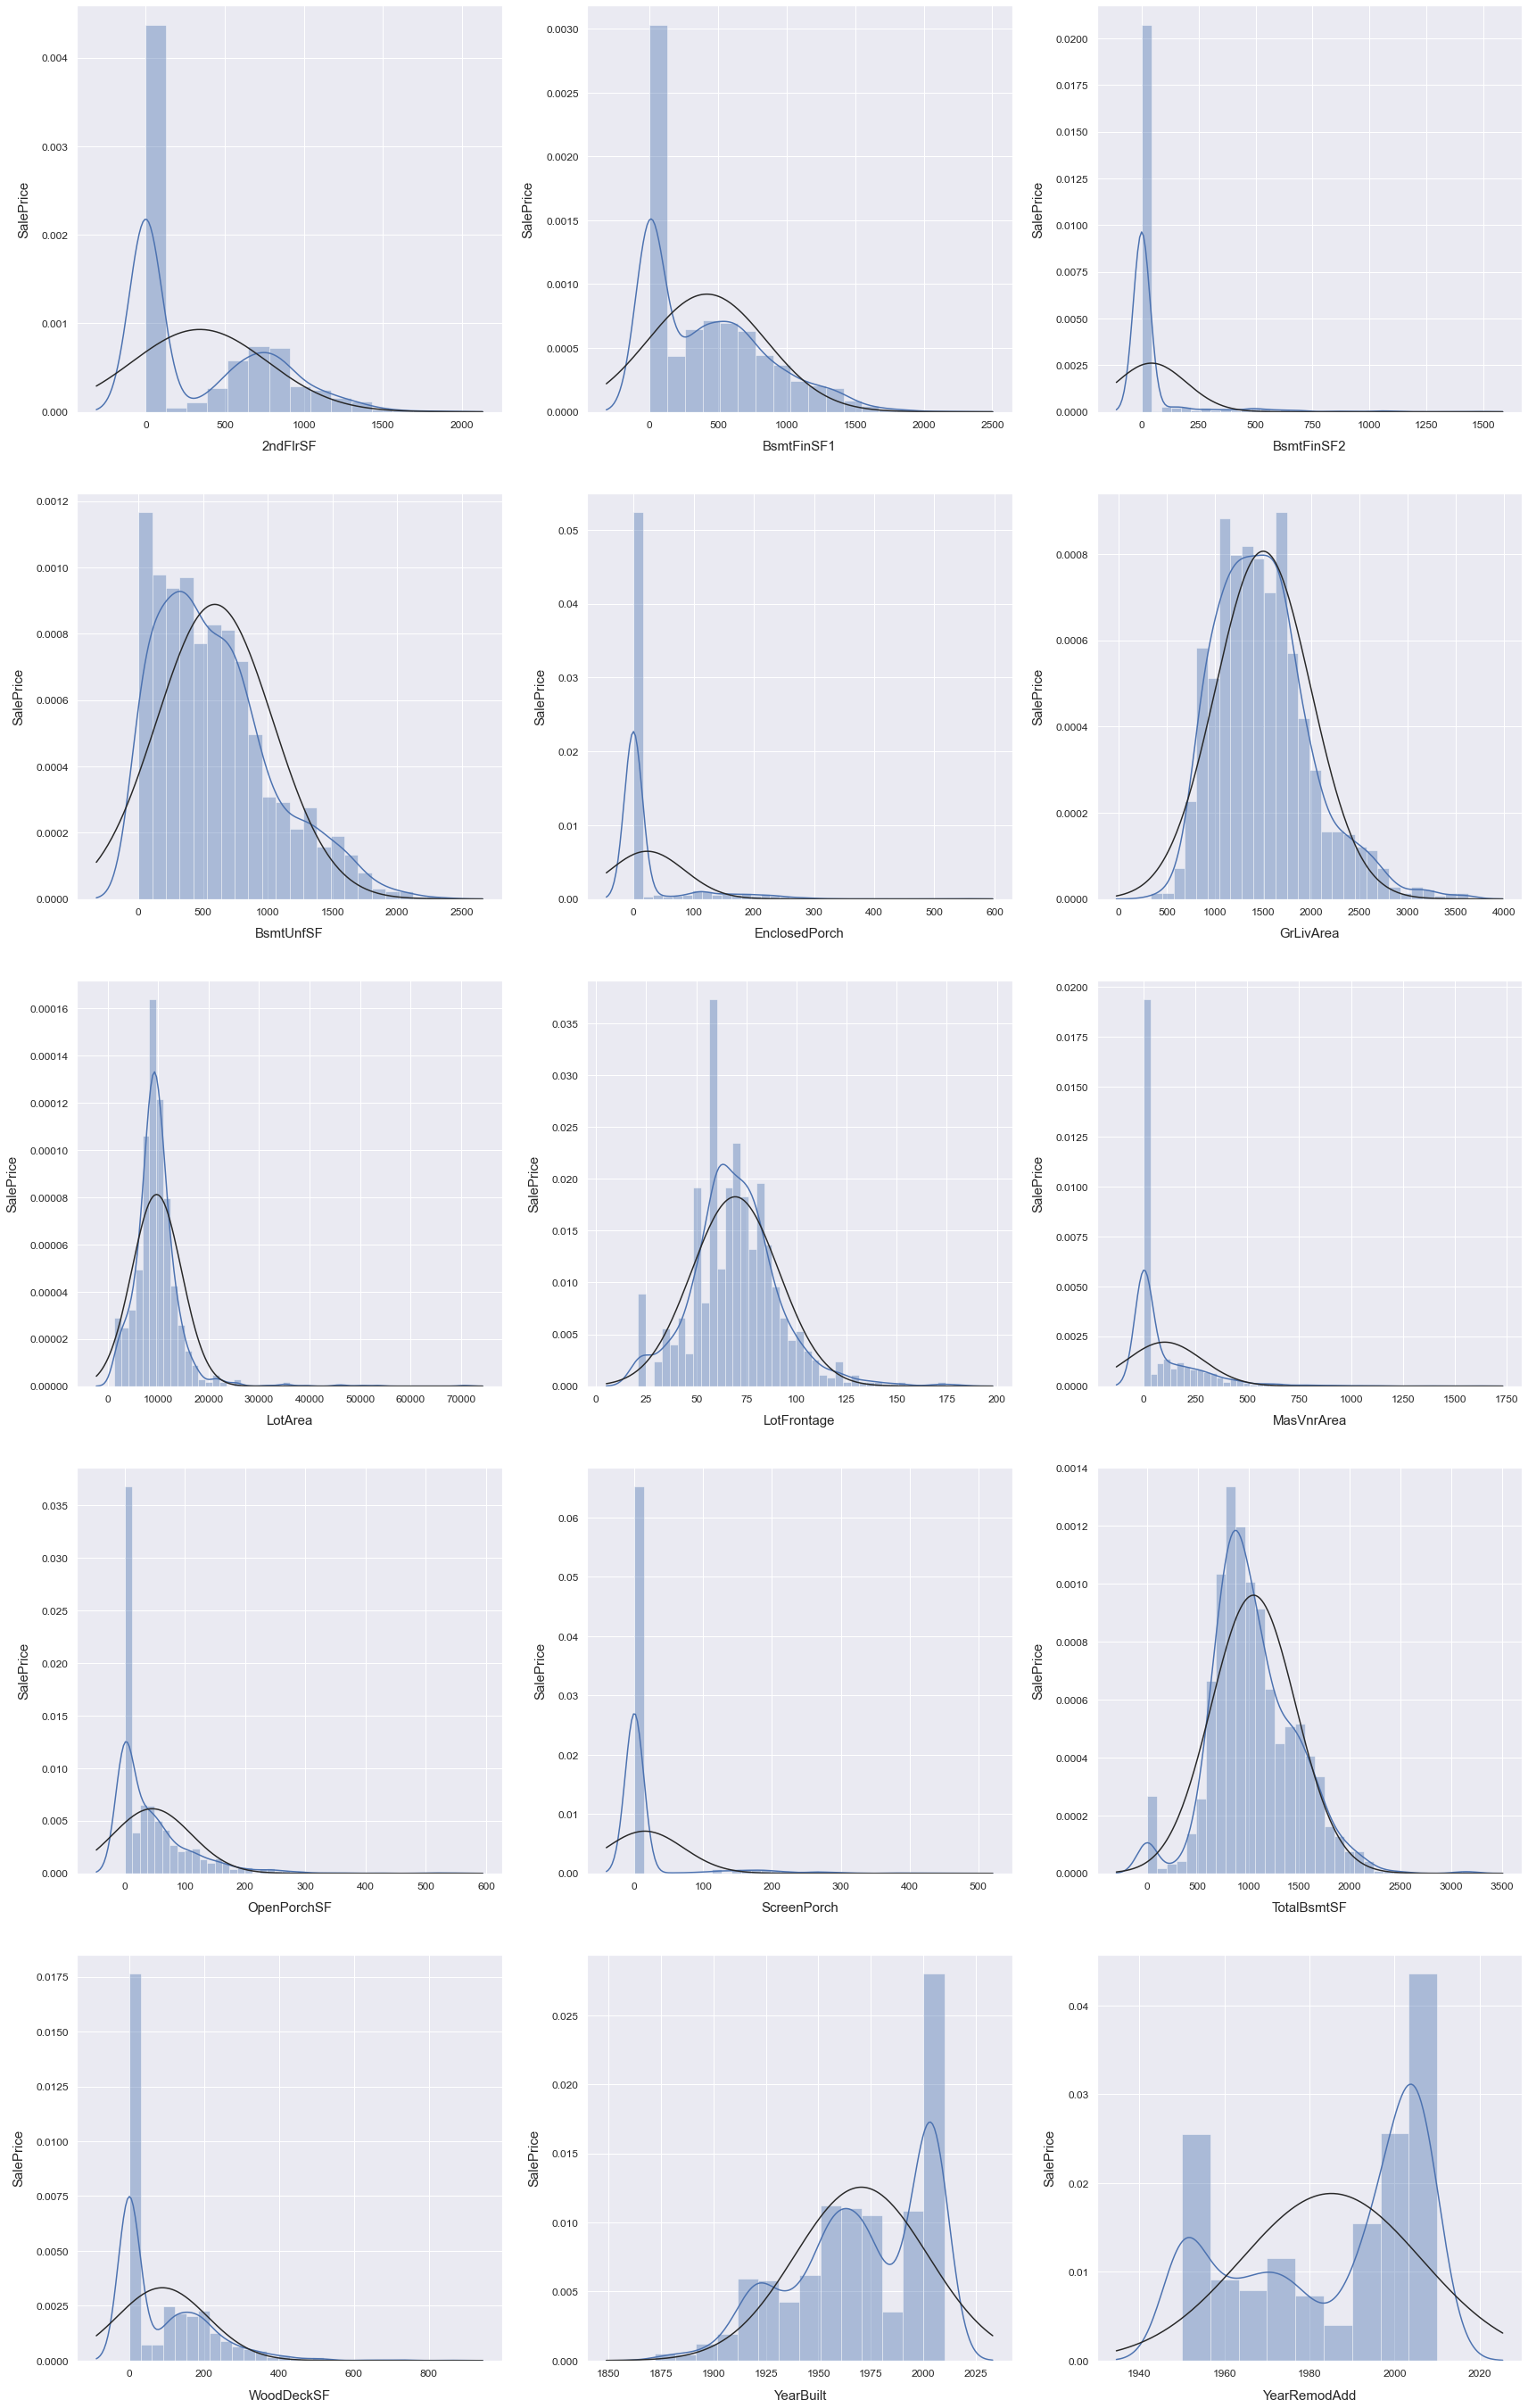

In [30]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 60))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(sorted(list(nums)), 1):
    if feature=='SalePrice':
        break
    plt.subplot(len(list(nums)), 3, i)
    sns.distplot(train[feature], fit=norm)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
        
plt.show()

In [31]:
data = pd.get_dummies(data).reset_index(drop=True)
data.shape

(2654, 270)

## Восстановление train и test

In [32]:
X = data.iloc[:len(train_labels), :]
X_test = data.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1195, 270), (1195,), (1459, 270))

# Model Selection

## Библиотеки

In [33]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## Задаем параметры кросс-валидации и определяем метрику

In [34]:
# Кросс-валидация
kf = KFold(n_splits=12, random_state=17, shuffle=True)

In [35]:
# Метрика
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

## Базовые модели

In [36]:
regressors = {
    'Lasso': make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state=17)),
    'ENet': make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio = 9, random_state=17)),
    "LinearRegression" : LinearRegression(),
    "RandomForest" : RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42),
    "XGBoost" : xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1), # XGBoost takes too long
    "LGBM" : lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11),
    "CatBoost" : CatBoostRegressor(verbose=False)
}


Кросс-валидация для каждой модели

In [37]:
i = 0
clf_best_params = regressors.copy()
valid_scores = pd.DataFrame({'Regressor': regressors.keys(), 'Score mean': np.zeros(
    len(regressors)), 'Score std': np.zeros(len(regressors))})
for key, regressor in regressors.items():

    # Crossval
    score = cv_rmse(regressor)
    valid_scores.iloc[i, 1] = score.mean()
    valid_scores.iloc[i, 2] = score.std()
    i += 1

[23:19:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:19:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:19:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "si

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [38]:
# Результаты
valid_scores.sort_values('Score mean', ascending=True)

,Regressor,Score mean,Score std
0,Lasso,0.113481,0.012536
6,CatBoost,0.115941,0.015820
4,XGBoost,0.117917,0.015723
5,LGBM,0.118536,0.016010
3,RandomForest,0.143501,0.020282
2,LinearRegression,6025.588408,18121.016466
1,ENet,NaN,NaN


In [39]:
# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(regressors['Lasso'], 
                                           regressors['RandomForest'],
                                           regressors['XGBoost'], 
                                           regressors['LGBM'], regressors['CatBoost']),
                                meta_regressor=regressors['XGBoost'],
                                use_features_in_secondary=True)

## Обучение моделей

In [40]:
# Удаляем лишние модели
[regressors.pop(key) for key in ['ENet', 'LinearRegression']]

[Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('elasticnet',
                  ElasticNet(alpha=0.0005, l1_ratio=9, random_state=17))]),
 LinearRegression()]

In [41]:
valid_scores.drop([1, 2], inplace=True)

In [42]:
valid_scores

,Regressor,Score mean,Score std
0,Lasso,0.113481,0.012536
3,RandomForest,0.143501,0.020282
4,XGBoost,0.117917,0.015723
5,LGBM,0.118536,0.016010
6,CatBoost,0.115941,0.015820


In [43]:
for regressor in regressors.values():
    regressor.fit(X, train_labels)

[23:20:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 wi

In [44]:
stack_gen.fit(np.array(X), np.array(train_labels))

[23:21:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:21:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:21:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "si

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.4603,
                                                enable_categorical=False,
                                                gamma=0.0468, gpu_id=-1,
                                                importance_type=None,
                                                interaction_constraints='',
                                                learning_rate=0.05,
                                                max_delta_step=0, max_depth=3,
                                                min_child_weight=1.7817,
                                                missing=nan,
                                                monotone_constraints='()',
           

In [45]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.2 * regressors['Lasso'].predict(X)) + \
            (0.1 * regressors['CatBoost'].predict(X)) + \
            (0.1 * regressors['XGBoost'].predict(X)) + \
            (0.1 * regressors['LGBM'].predict(X)) + \
            (0.05 * regressors['RandomForest'].predict(X)) + \
            (0.45 * stack_gen.predict(np.array(X))))

In [53]:
# Get final precitions from the blended model
blended_score = rmsle(train_labels, blended_predictions(X))
valid_scores = valid_scores.append({'Regressor': 'blend', 'Score mean': blended_score.mean(), 'Score std': blended_score.std()},
                   ignore_index=True)
valid_scores

,Regressor,Score mean,Score std
0,Lasso,0.113481,0.012536
1,RandomForest,0.143501,0.020282
2,XGBoost,0.117917,0.015723
3,LGBM,0.118536,0.016010
4,CatBoost,0.115941,0.015820
5,blend,0.065487,0.000000
6,blend,0.065487,0.000000


## Визуализация результатов

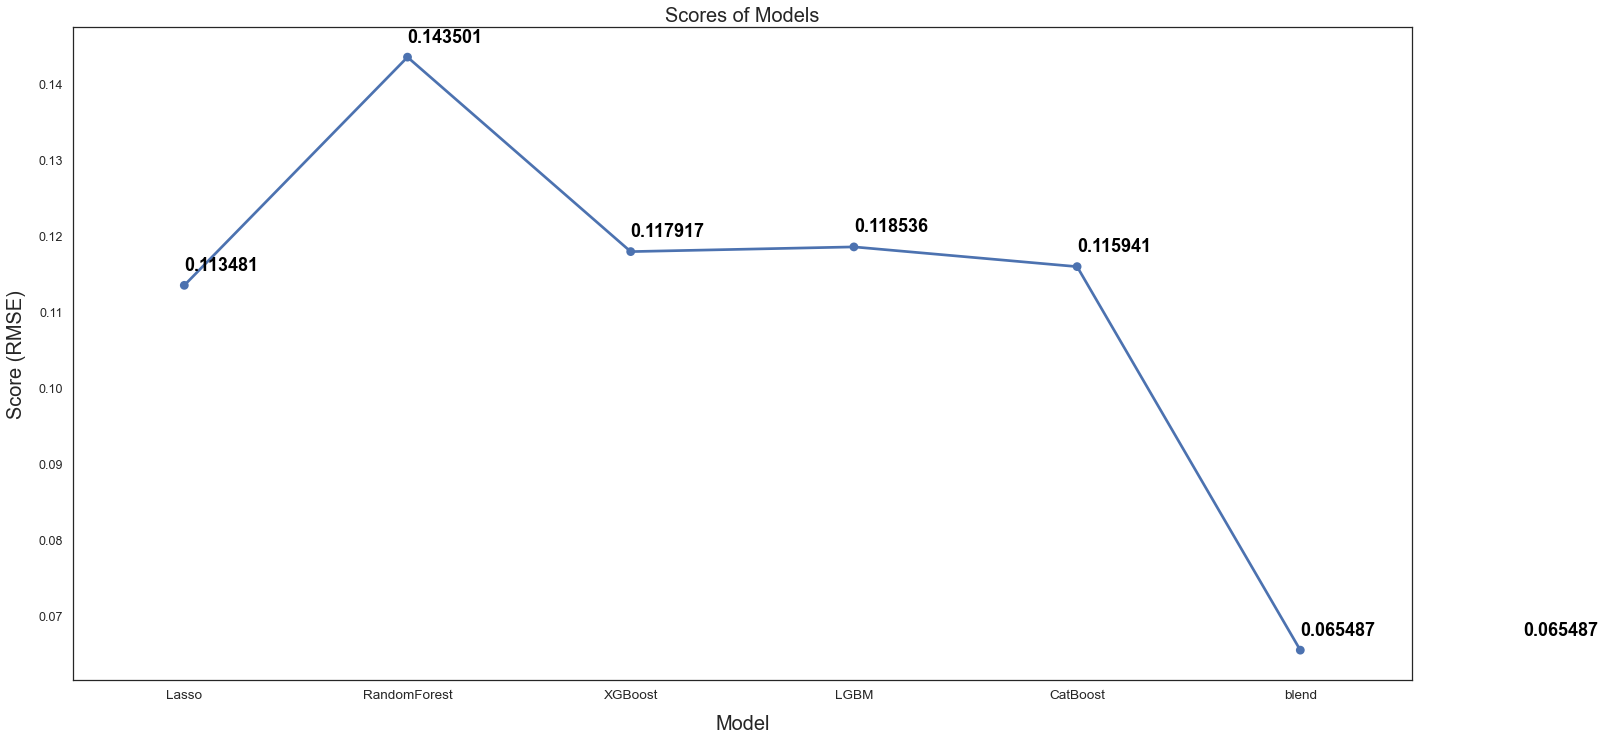

In [57]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(valid_scores['Regressor'], y=valid_scores['Score mean'], markers=['o'], linestyles=['-'])
for i in range(len(valid_scores)):
    ax.text(i, valid_scores.iloc[i, 1] + 0.002, '{:.6f}'.format(valid_scores.iloc[i, 1]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

Общее предсказание оказалось лучше на тестовой выборке

# Submission

In [61]:
submission = pd.read_csv("sample_submission.csv")
submission.shape

(1459, 2)

In [62]:
submission.iloc[:,1] = blended_predictions(X_test)
submission.iloc[:,1] = np.floor(np.expm1(blended_predictions(X_test)))

In [63]:
# Fix outleir predictions
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission_regression1.csv", index=False)

In [64]:
submission['SalePrice'] *= 1.001619
submission.to_csv("submission.csv", index=False)